In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = '2019_ONTIME_REPORTING_FSW.csv'
flight_data = pd.read_csv(file_path)

In [3]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   FL_DATE       object 
 1   CARRIER_CODE  object 
 2   TAIL_NUM      object 
 3   FL_NUM        int64  
 4   ORIGIN        object 
 5   ORIGIN_ST     object 
 6   DEST          object 
 7   DEST_ST       object 
 8   DEP_TIME      float64
 9   DEP_DELAY     float64
 10  ARR_TIME      float64
 11  ARR_DELAY     float64
 12  ELAPSED_TIME  float64
 13  DISTANCE      int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 202.7+ MB


In [4]:
flight_data = flight_data.dropna()

In [5]:
flight_data = flight_data.copy()

flight_data['FL_DATE'] = flight_data['FL_DATE'].astype('datetime64[us]')
flight_data['CARRIER_CODE'] = flight_data['CARRIER_CODE'].astype('string')
flight_data['TAIL_NUM'] = flight_data['TAIL_NUM'].astype('string')
flight_data['FL_NUM'] = flight_data['FL_NUM'].astype('string')
flight_data['ORIGIN'] = flight_data['ORIGIN'].astype('string')
flight_data['ORIGIN_ST'] = flight_data['ORIGIN_ST'].astype('string')
flight_data['DEST'] = flight_data['DEST'].astype('string')
flight_data['DEST_ST'] = flight_data['DEST_ST'].astype('string')
flight_data['DEP_TIME'] = flight_data['DEP_TIME'].astype('datetime64[us]')
flight_data['DEP_DELAY'] = flight_data['DEP_DELAY'].astype('int')
flight_data['ARR_TIME'] = flight_data['ARR_TIME'].astype('datetime64[us]')
flight_data['ARR_DELAY'] = flight_data['ARR_DELAY'].astype('int')
flight_data['ELAPSED_TIME'] = flight_data['ELAPSED_TIME'].astype('int')
flight_data['DISTANCE'] = flight_data['DISTANCE'].astype('float')

In [6]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1865619 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   FL_DATE       datetime64[us]
 1   CARRIER_CODE  string        
 2   TAIL_NUM      string        
 3   FL_NUM        string        
 4   ORIGIN        string        
 5   ORIGIN_ST     string        
 6   DEST          string        
 7   DEST_ST       string        
 8   DEP_TIME      datetime64[us]
 9   DEP_DELAY     int64         
 10  ARR_TIME      datetime64[us]
 11  ARR_DELAY     int64         
 12  ELAPSED_TIME  int64         
 13  DISTANCE      float64       
dtypes: datetime64[us](3), float64(1), int64(3), string(7)
memory usage: 213.5 MB


In [7]:
flight_data = flight_data.drop_duplicates()

# Question 3 — (20 points)

1. Explore patterns in the region i.e. the 3 states (AZ, NV, CA). Determine which region has the most air traffic. Comment on your findings and visualize the results.

    In 2019, California topped the charts with a whopping 798,690 flights, making it the busiest state for air travel. Arizona followed with 201,804 flights, and Nevada wasn't far behind with 181,985 flights. California's nine airports, some of which handle international flights, play a significant role in connecting the state to countless cities globally, explaining its dominance in air traffic.

In [82]:
region_flights = flight_data[flight_data['ORIGIN_ST'].isin(['AZ', 'NV', 'CA'])]

# Grouping the filtered data by state and count the number of flights in each state
air_traffic = region_flights.groupby('ORIGIN_ST').size().reset_index(name='Flight Count')

# Displaying the flight count for each state
for state, count in zip(air_traffic['ORIGIN_ST'], air_traffic['Flight Count']):
    print(f"{state}: {count}")

AZ: 201804
CA: 798690
NV: 181985


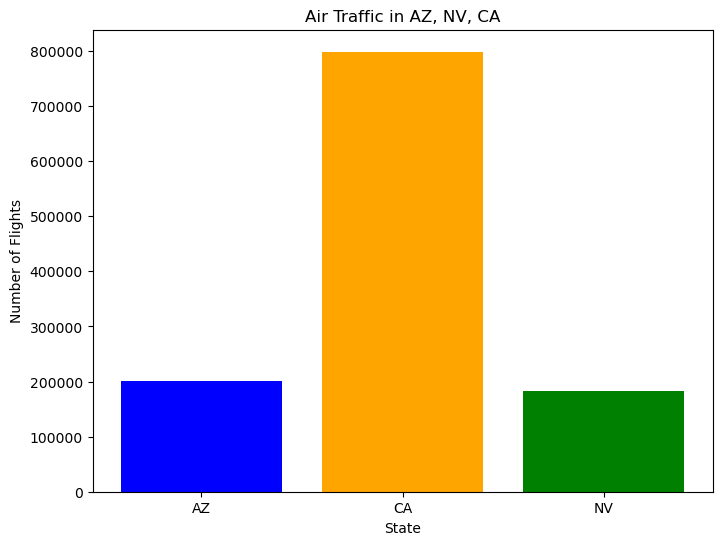

In [84]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(air_traffic['ORIGIN_ST'], air_traffic['Flight Count'], color=['blue', 'orange', 'green'])
plt.title('Air Traffic in AZ, NV, CA')
plt.xlabel('State')
plt.ylabel('Number of Flights')
plt.show()

2. For each region, analyze the most popular outbound/destination airports. For example, if a flight originated in CA (at any of its airports), where do they often go? Comment on your findings and visualize the top 5 results.

    Flights from California (CA), Nevada (NV), and Arizona (AZ) are frequently flown into major cities like in Phoenix-Arizona, Seattle-Washington, San Francisco-California and Los Angeles-California. These destinations likely attract high air traffic due to various factors such as being business hubs, tourist attractions, major metropolitan areas, and airline hub locations.   

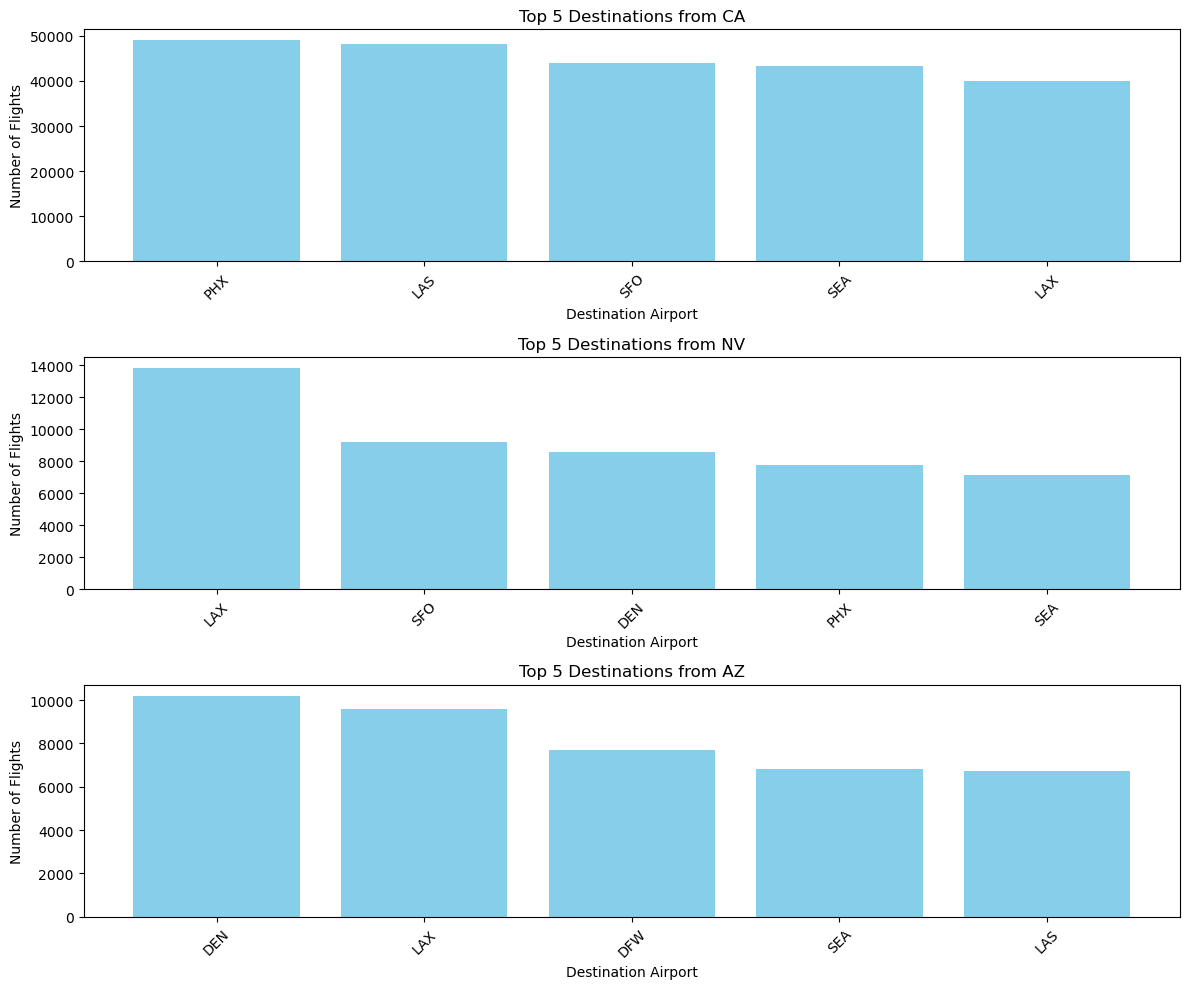

In [9]:
# Aggregating flight data by origin state and destination, and sorting the results first by origin state and then by flight count in descending order.
top_destinations = region_flights.groupby(['ORIGIN_ST', 'DEST']).size().reset_index(name='Flight Count')
top_destinations_sorted = top_destinations.sort_values(by=['ORIGIN_ST', 'Flight Count'], ascending=[True, False])

# Plotting the bar chart
plt.figure(figsize=(12, 10))
for i, region in enumerate(['CA', 'NV', 'AZ'], start=1):
    top_destinations_region = top_destinations_sorted[top_destinations_sorted['ORIGIN_ST'] == region].head(5)
    plt.subplot(3, 1, i)
    plt.bar(top_destinations_region['DEST'], top_destinations_region['Flight Count'], color='skyblue')
    plt.title(f'Top 5 Destinations from {region}')
    plt.xlabel('Destination Airport')
    plt.ylabel('Number of Flights')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

# Question 4 — (20 points)

1. Explore the carriers. Calculate the proportion of flights for each airline/operator. Visualize the top 10 results. Explain the results.

    In 2019, Southwest Airlines topped the charts with 543,773 flights, showcasing its dominant position in the US aviation market. American Airlines followed closely behind with 281,138 flights, while United Airways operated 233,930 flights. These figures reflect the significant market presence of these airlines among the most common carriers in the United States during 2019.

In [79]:
# Grouping flight data by carrier code and number of flights and selecting the top 10 carriers with the highest flight counts.
flights_airlines = flight_data.groupby('CARRIER_CODE')['FL_NUM'].size().reset_index(name='Flight Count')
top_10_airlines = flights_airlines.nlargest(10, 'Flight Count')
top_10_airlines

,CARRIER_CODE,Flight Count
12,WN,543773
0,AA,281138
11,UA,233930
10,OO,233763
3,DL,187404
1,AS,147170
2,B6,56697
9,NK,53701
13,YV,41408
5,F9,34972


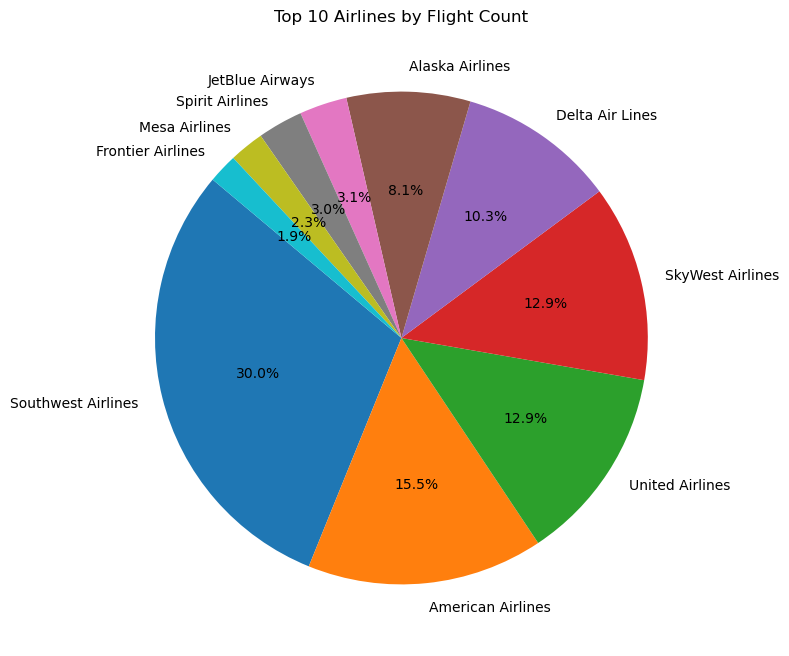

In [78]:
# Mapping arline names with its codes
carrier_names = {
    'WN': 'Southwest Airlines',
    'AA': 'American Airlines',
    'UA': 'United Airlines',
    'OO': 'SkyWest Airlines',
    'DL': 'Delta Air Lines',
    'AS': 'Alaska Airlines',
    'B6': 'JetBlue Airways',
    'NK': 'Spirit Airlines',
    'YV': 'Mesa Airlines',
    'F9': 'Frontier Airlines'
}

top_10_airlines['Airline Name'] = top_10_airlines['CARRIER_CODE'].map(carrier_names)

# Extracting based on codes and flight counts
airlines = top_10_airlines['Airline Name']
flight_counts = top_10_airlines['Flight Count']

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(flight_counts, labels=airlines, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Airlines by Flight Count')
plt.axis('equal')
plt.show()

2. Analyze the flight delays for each Airline/Carrier and prepare summary statistics to explain the patterns in the delays. Visualize the results. Explain the patterns and demonstrate which carriers are more prone to flight delays. 
Note: you will need to analyze the airlines/carriers across multiple airports in order to conclude that they have a pattern of being late

    Based on our analysis, Southwest Airlines (WN) and American Airlines (AA) stands out with the highest number of delays, suggesting potential systemic issues or operational challenges that might affect its on-time performance. Conversely, Republic Airways (YX)  and ExpressJet Airlines (EV) has the fewest delays, implying more efficient operations or a smaller flight network, which could contribute to better punctuality.

In [74]:
# Displaying the number of delays for each airline
airline_delays = flight_data.groupby('CARRIER_CODE')['DEP_DELAY'].size().reset_index(name='Airline Delays')
airline_delays

,CARRIER_CODE,Airline Delays
0,AA,281138
1,AS,147170
2,B6,56697
3,DL,187404
4,EV,94
5,F9,34972
6,G4,33946
7,HA,15699
8,MQ,1770
9,NK,53701


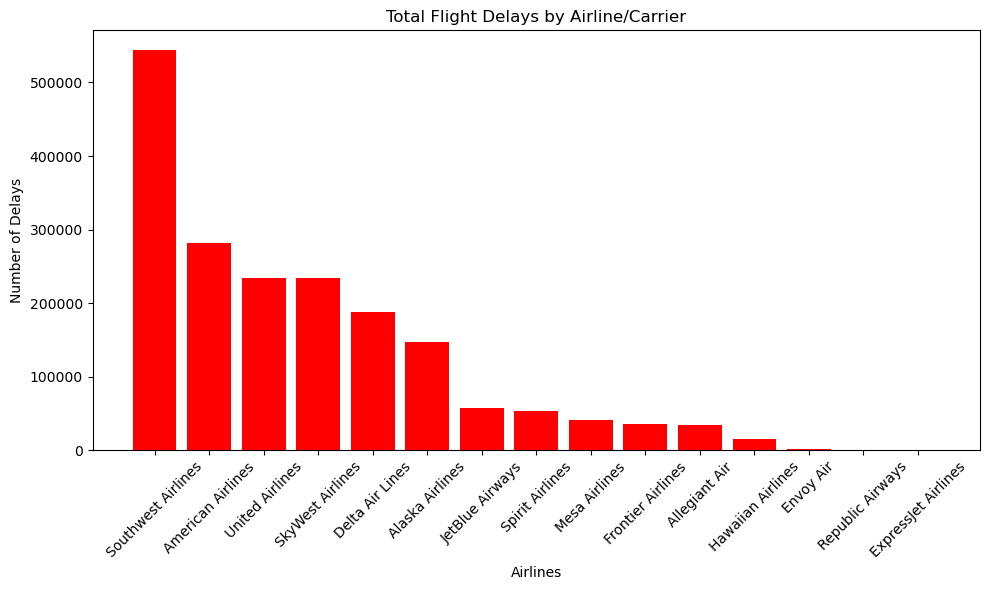

In [73]:
import matplotlib.pyplot as plt

# Mapping dictionary for carrier codes to airline names
carrier_names = {
    'AA': 'American Airlines',
    'AS': 'Alaska Airlines',
    'B6': 'JetBlue Airways',
    'DL': 'Delta Air Lines',
    'EV': 'ExpressJet Airlines',
    'F9': 'Frontier Airlines',
    'G4': 'Allegiant Air',
    'HA': 'Hawaiian Airlines',
    'MQ': 'Envoy Air',
    'NK': 'Spirit Airlines',
    'OO': 'SkyWest Airlines',
    'UA': 'United Airlines',
    'WN': 'Southwest Airlines',
    'YV': 'Mesa Airlines',
    'YX': 'Republic Airways'
}

# Mapping the airline names
airline_delays['Airline Name'] = airline_delays['CARRIER_CODE'].map(carrier_names)

# Sorting the df by number of delays
airline_delays = airline_delays.sort_values(by='Airline Delays', ascending=False)

# Creating a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(airline_delays['Airline Name'], airline_delays['Airline Delays'], color='red')

plt.xlabel('Airlines')
plt.ylabel('Number of Delays')
plt.title('Total Flight Delays by Airline/Carrier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()